# TASK - 4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Sample Dataset :-

https://www.kaggle.com/datasets/jp797498e/twitter- entity-sentiment-analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv(r"C:\Users\manee\OneDrive\Desktop\Prodigy\Task-4\twitter_training.csv")

In [3]:
data

,ID,Entity\t,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
data.shape

(74681, 4)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71980 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71980 non-null  int64 
 1   Entity	    71980 non-null  object
 2   Sentiment  71980 non-null  object
 3   text       71980 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [24]:
# Ensure all values in the text column are strings
data['text'] = data['text'].astype(str)

C:\Users\manee\AppData\Local\Temp\ipykernel_25468\795972547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


In [ ]:
data.info()

In [6]:
data.describe

<bound method NDFrame.describe of          ID     Entity\t Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                    text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac wind

In [7]:
data.duplicated().sum()

2701

In [8]:
# Remove duplicates
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

ID             0
Entity\t       0
Sentiment      0
text         326
dtype: int64

In [11]:
# Remove rows with missing values
data.dropna()

,ID,Entity\t,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [12]:
data.isnull().sum()

ID             0
Entity\t       0
Sentiment      0
text         326
dtype: int64

In [13]:
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts

Negative      21787
Positive      19810
Neutral       17799
Irrelevant    12584
Name: Sentiment, dtype: int64

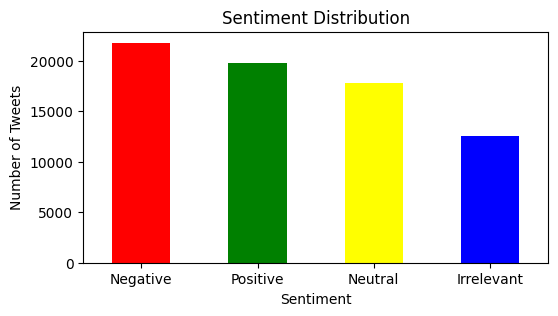

In [14]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Replace 'text' with the actual column name that contains the tweet text
text_column = 'text'  # Adjust this to the actual column name

In [16]:
# Ensure all values in the text column are strings
data[text_column] = data[text_column].astype(str)

C:\Users\manee\AppData\Local\Temp\ipykernel_25468\1310333760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[text_column] = data[text_column].astype(str)


In [17]:
# Function to get the sentiment of text
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to get sentiment for each tweet
data['Sentiment'] = data[text_column].apply(get_sentiment)

# Display the distribution of sentiments
print(data['Sentiment'].value_counts())

Positive    33038
Negative    20694
Neutral     18248
Name: Sentiment, dtype: int64


C:\Users\manee\AppData\Local\Temp\ipykernel_25468\3844674867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data[text_column].apply(get_sentiment)


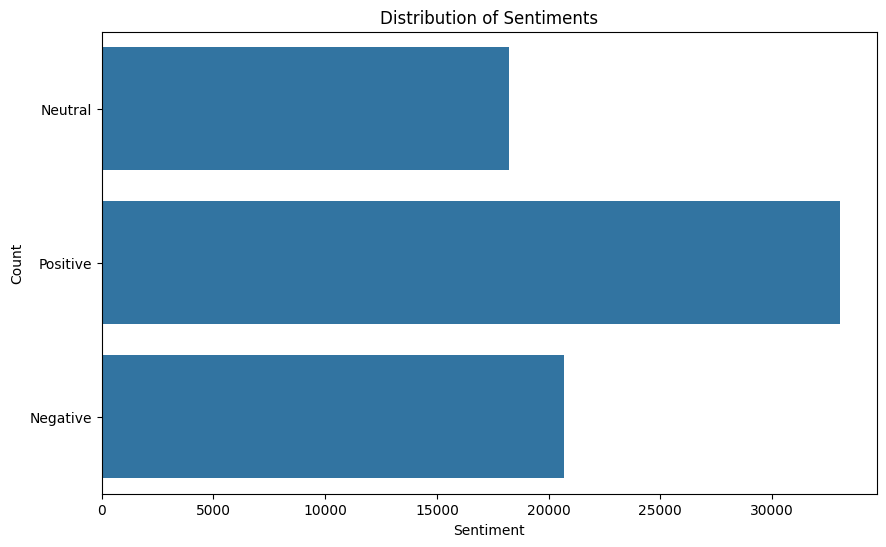

In [18]:
# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(data['Sentiment'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [19]:
# Word Cloud for Positive Sentiments
positive_texts = ' '.join(data[data['Sentiment'] == 'Positive'][text_column].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

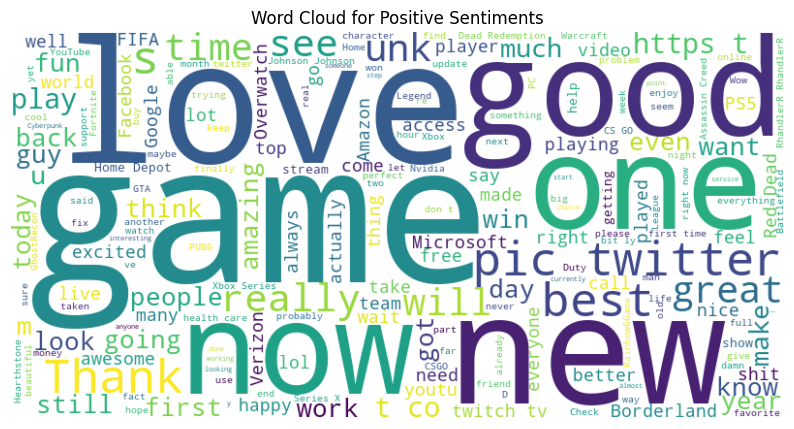

In [20]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

In [29]:
# Sentiment over time (assuming there's a 'created_at' column)
if 'created_at' in data.columns:
    data['created_at'] = pd.to_datetime(data['created_at'])
    data.set_index('created_at', inplace=True)

    sentiment_over_time = data['Sentiment'].resample('M').value_counts().unstack().fillna(0)
    sentiment_over_time.plot(kind='line', figsize=(14, 7), title='Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.show()

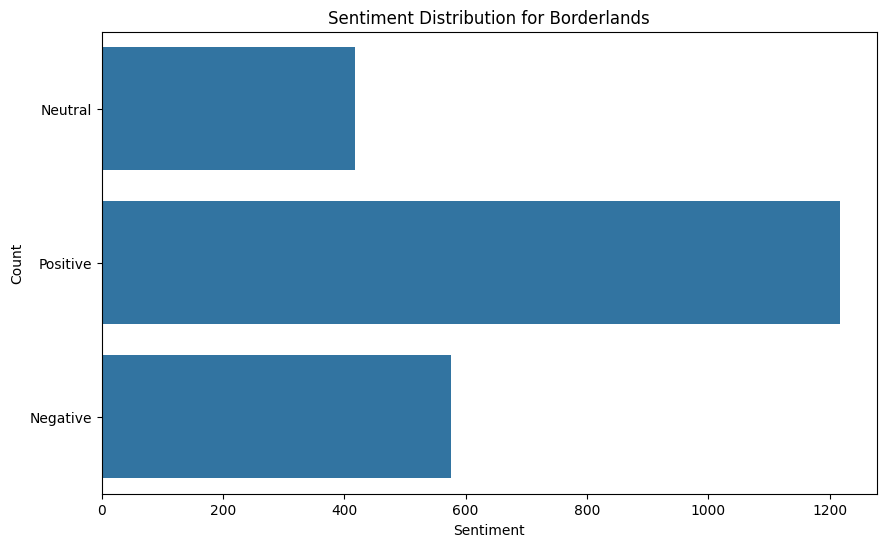

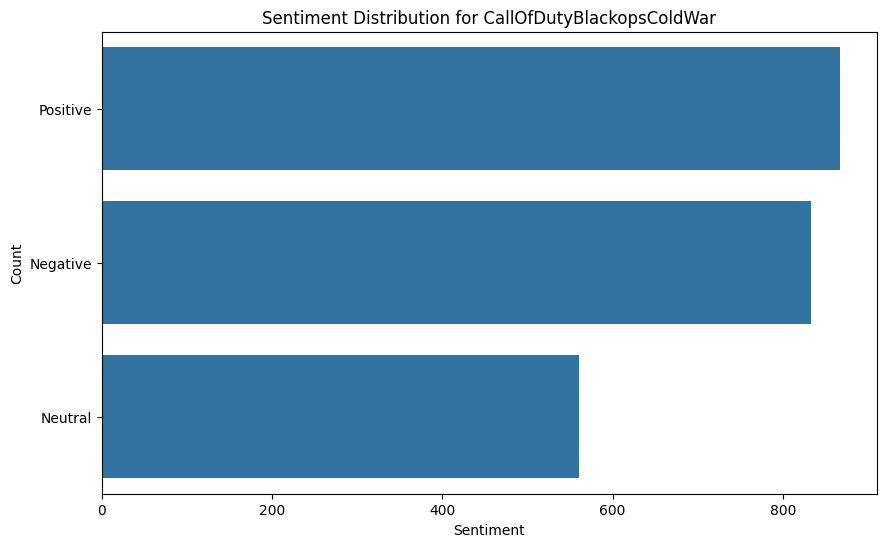

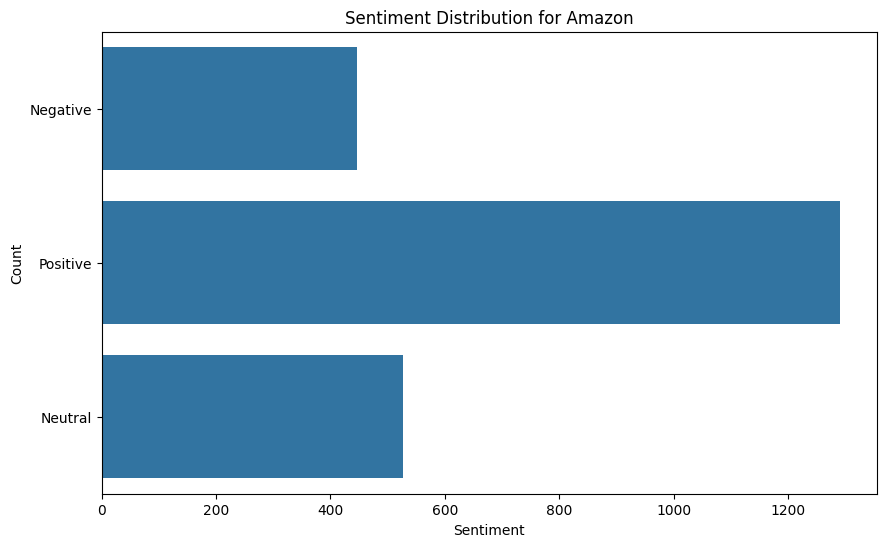

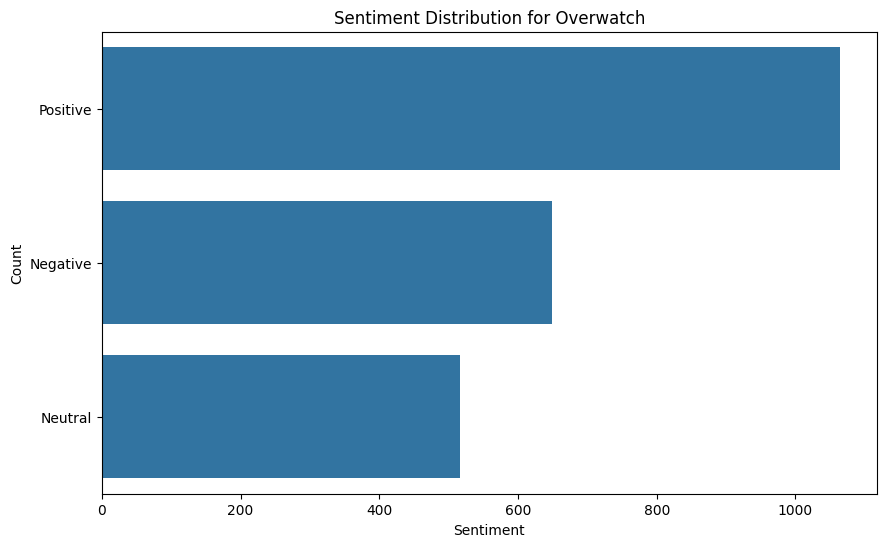

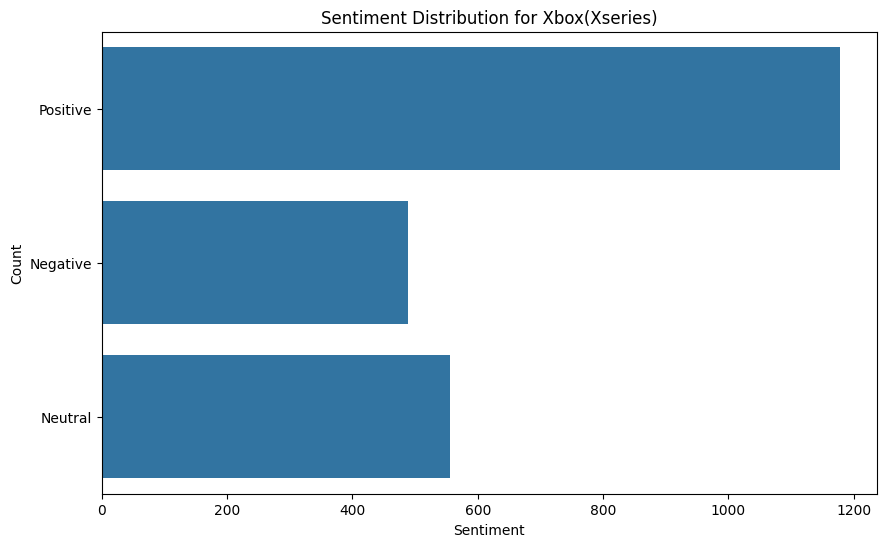

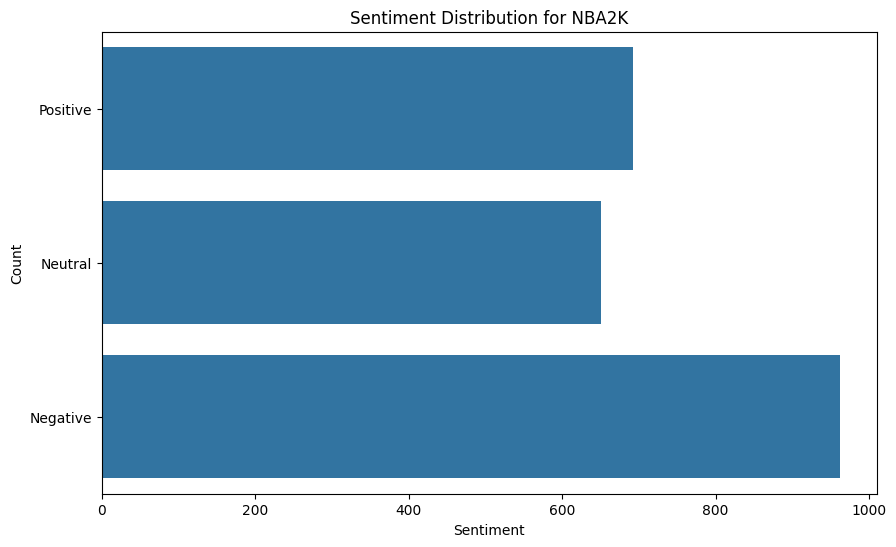

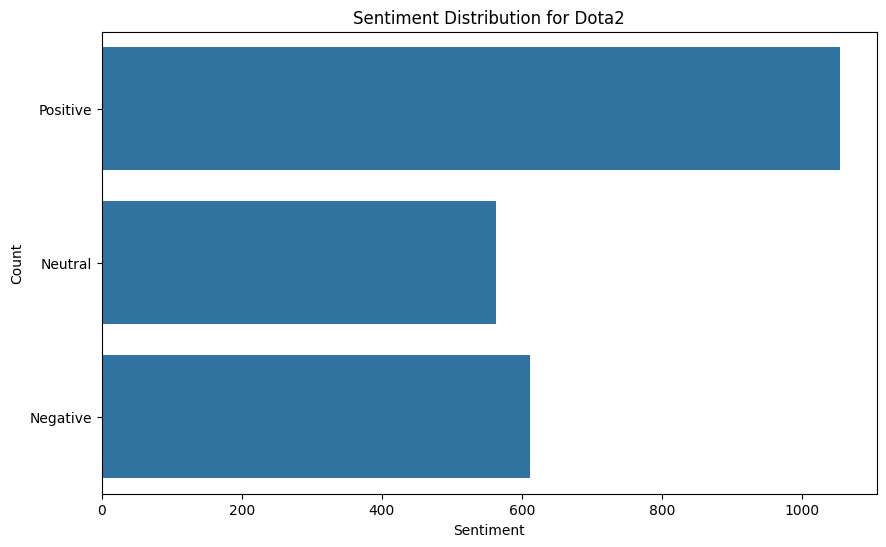

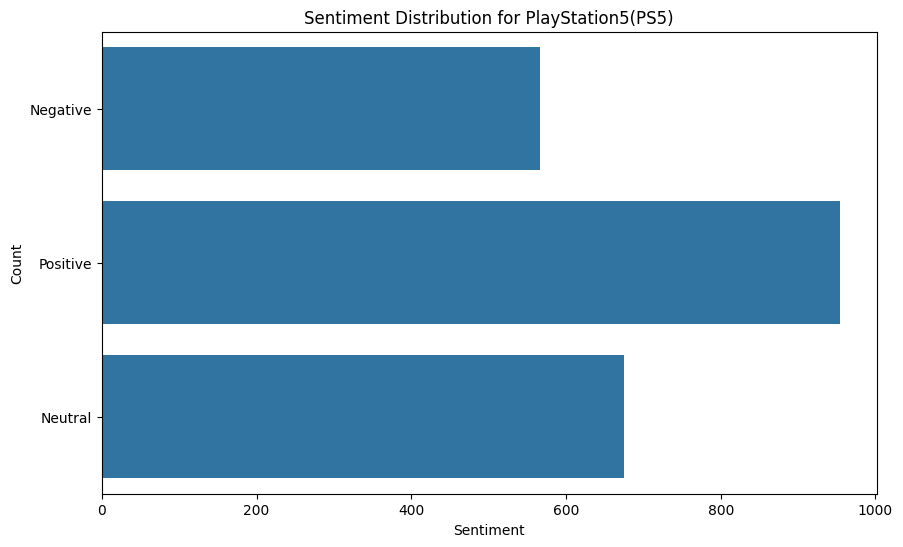

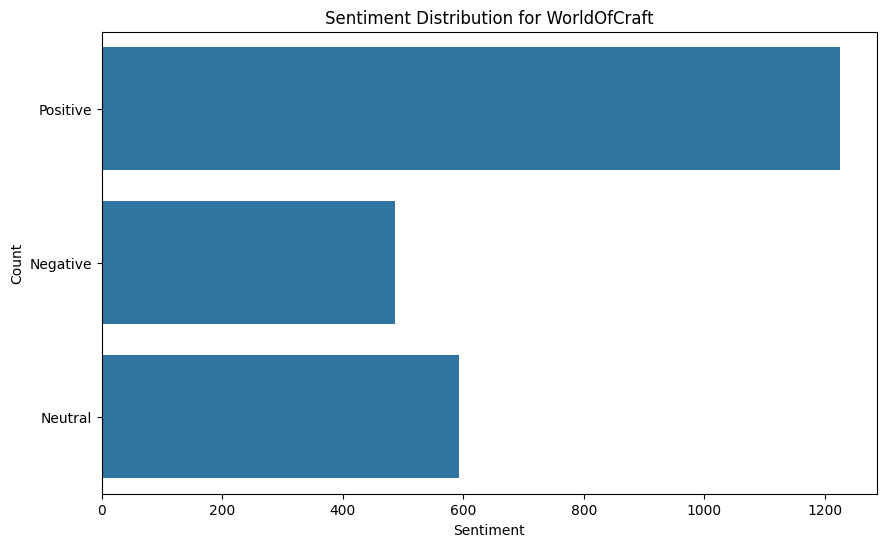

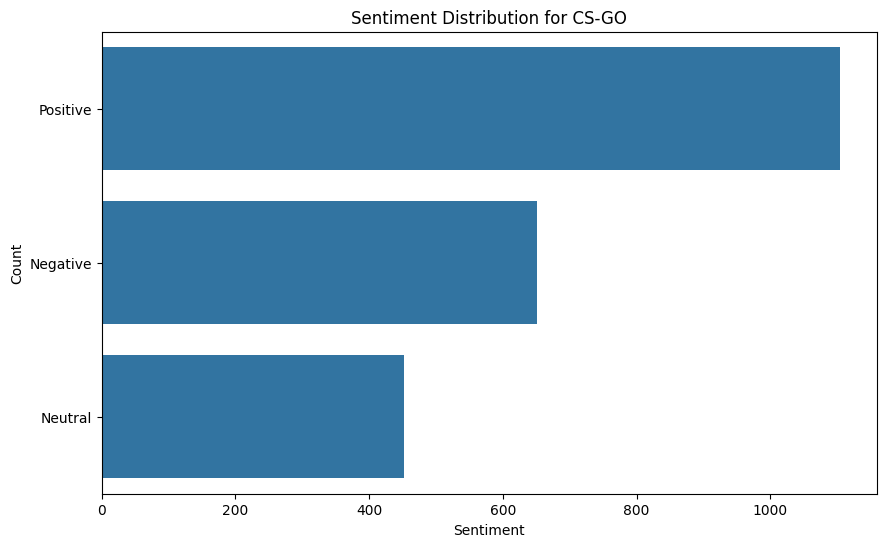

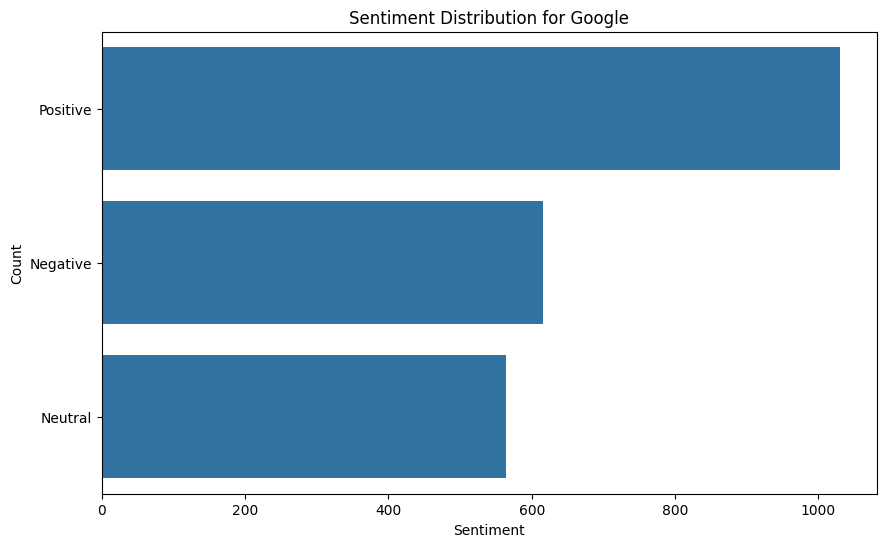

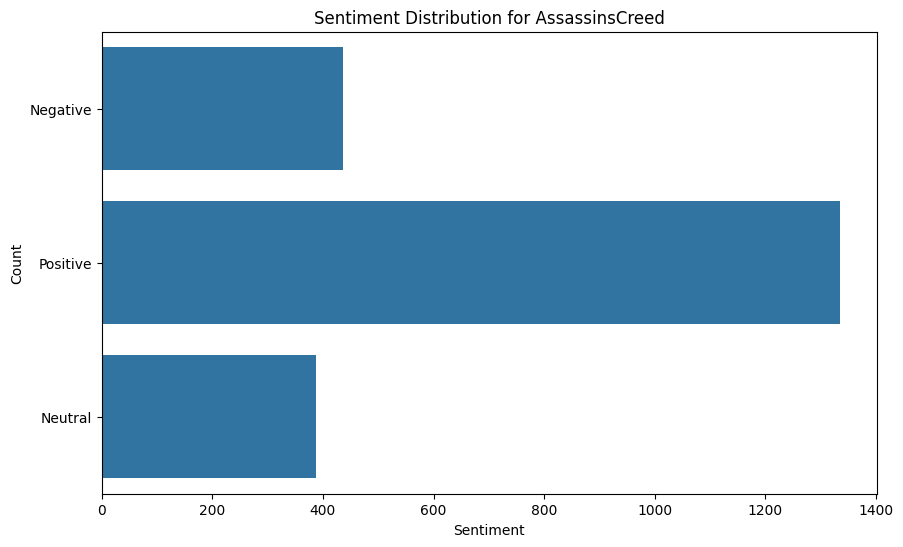

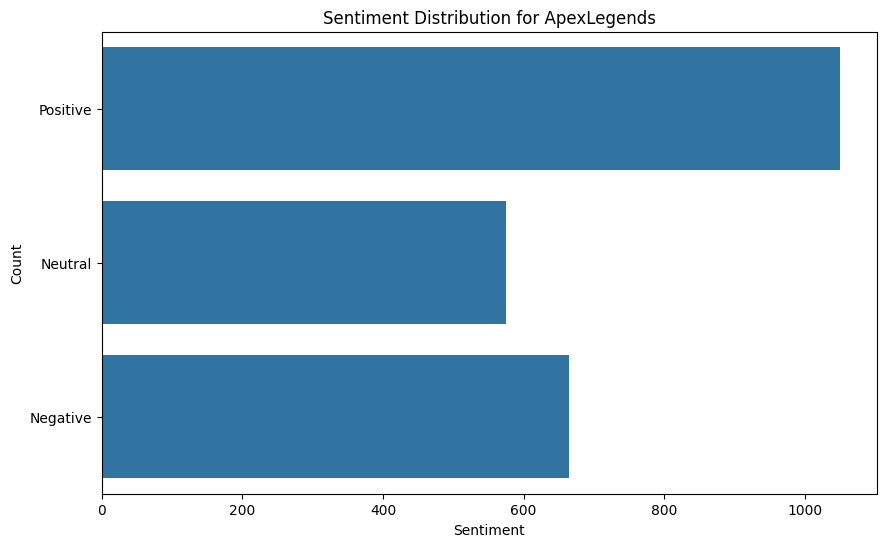

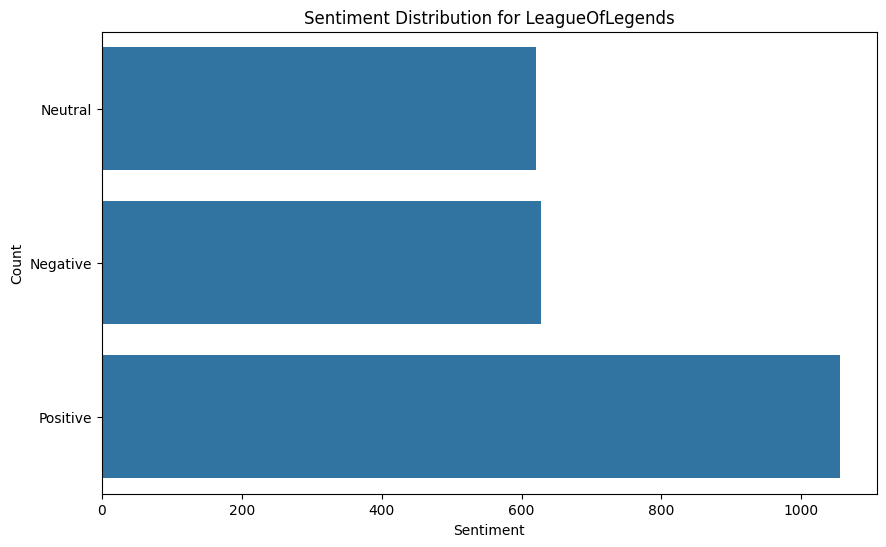

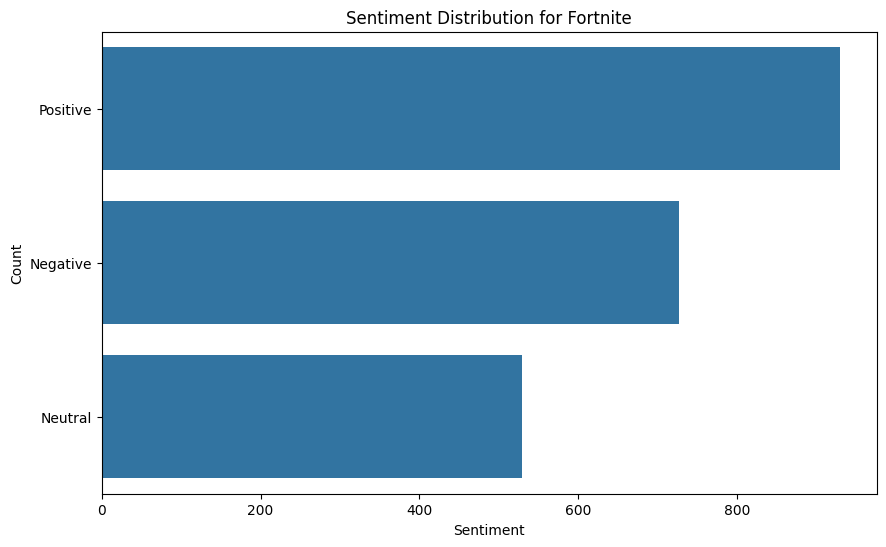

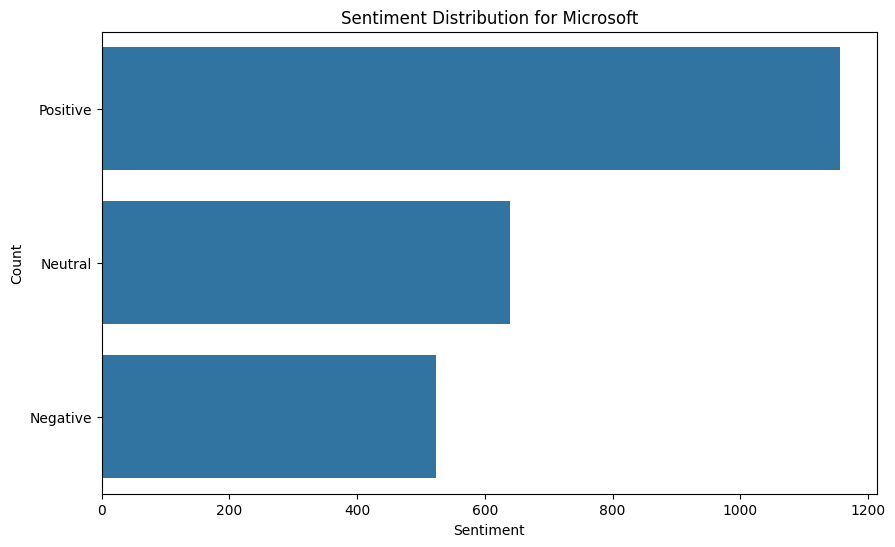

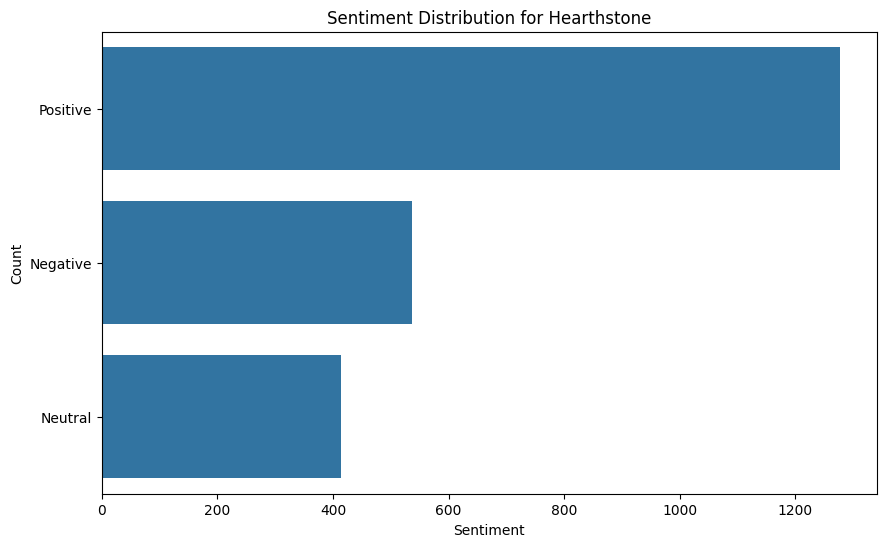

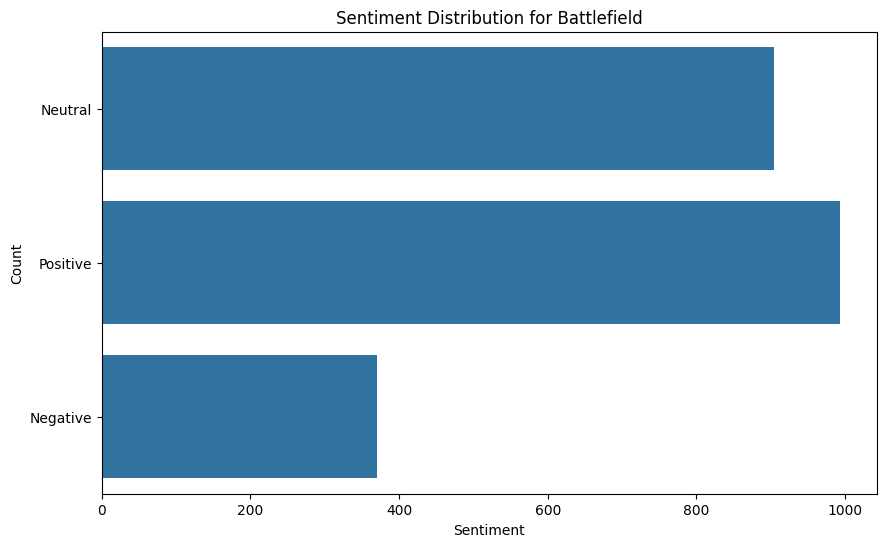

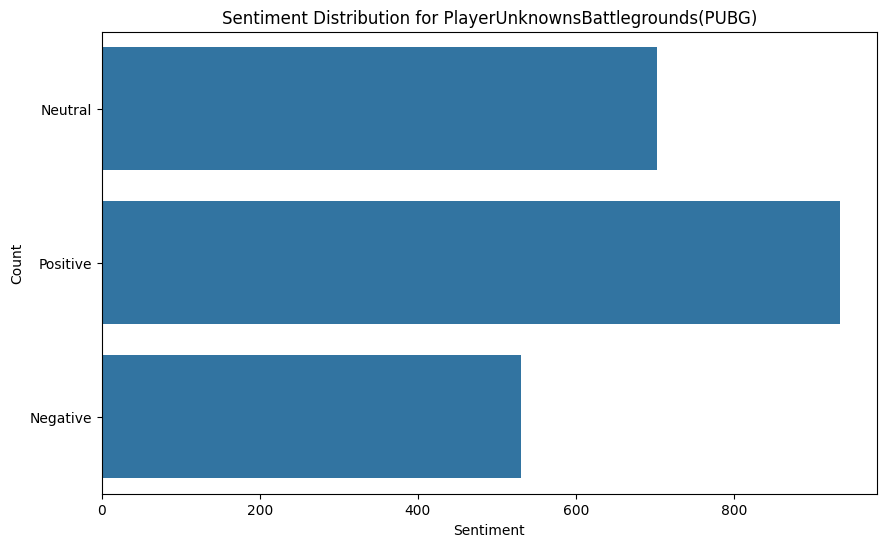

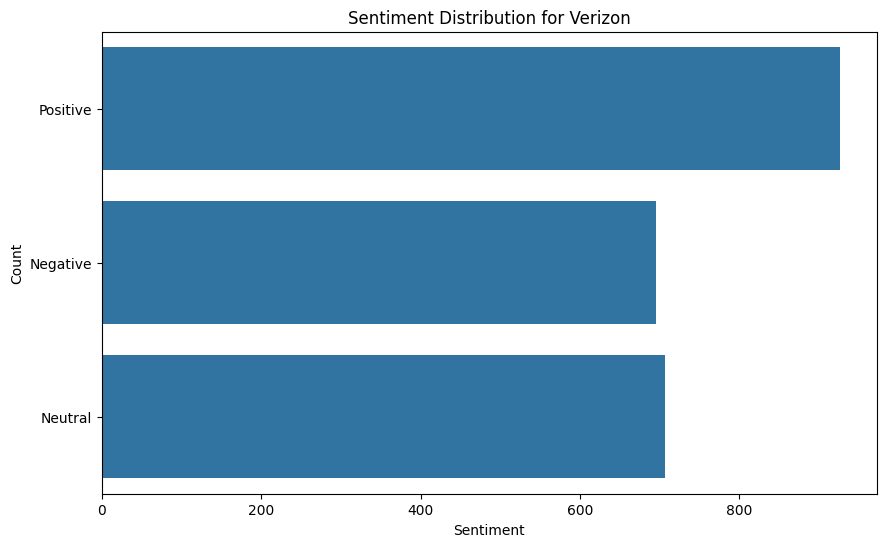

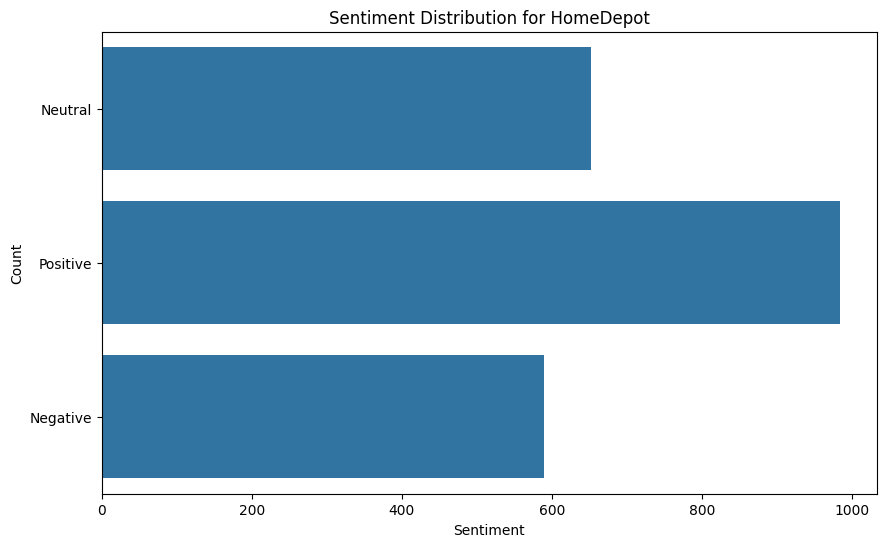

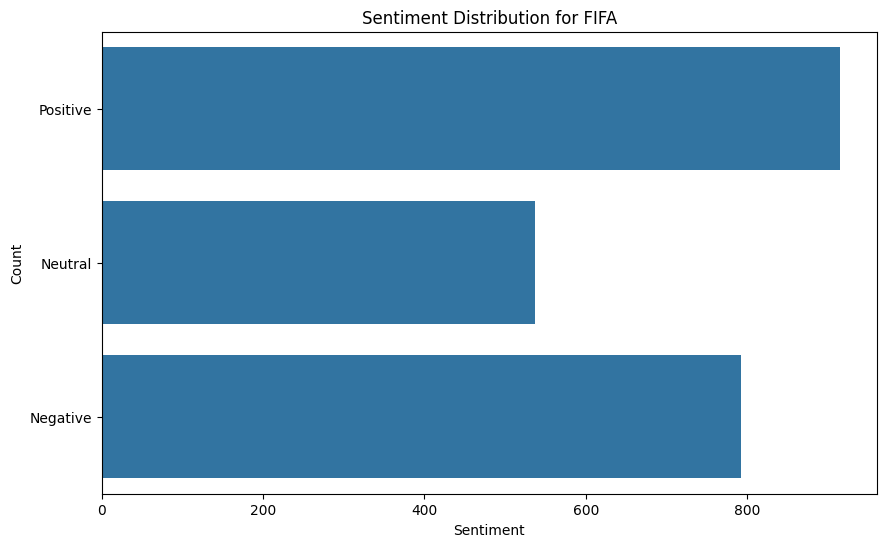

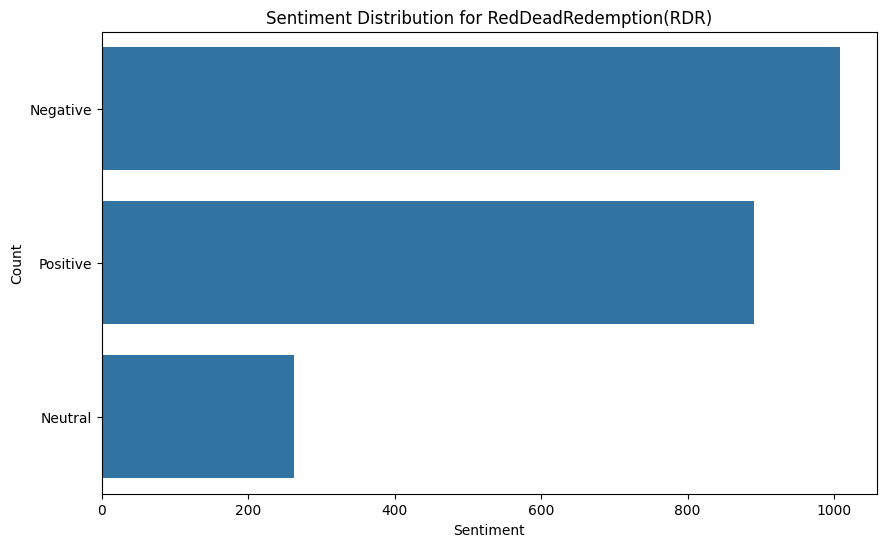

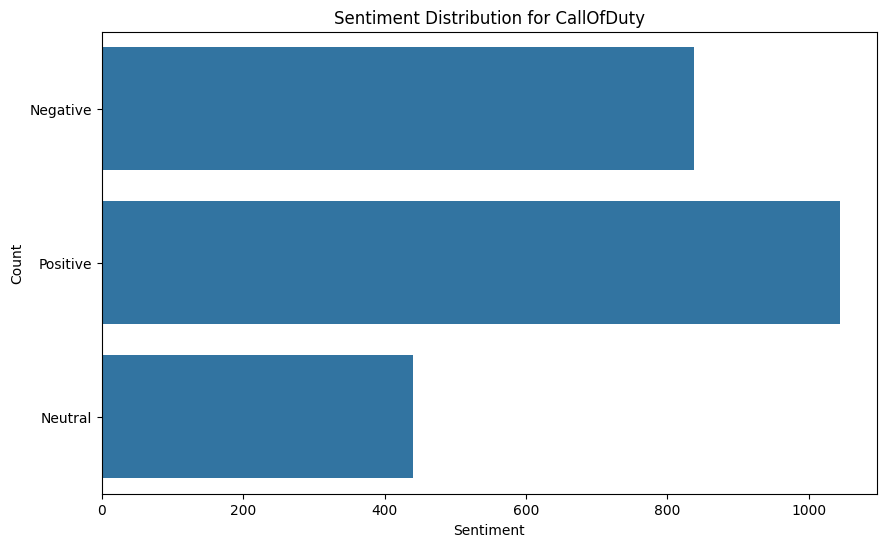

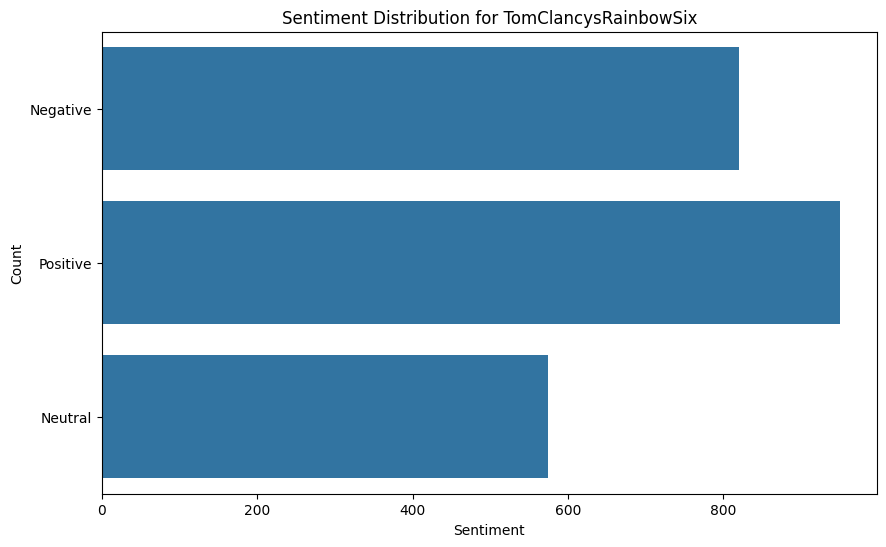

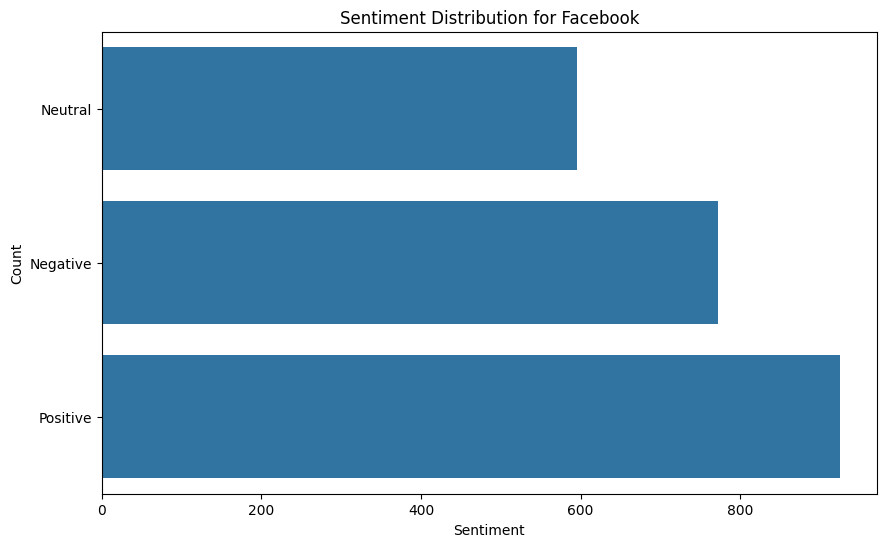

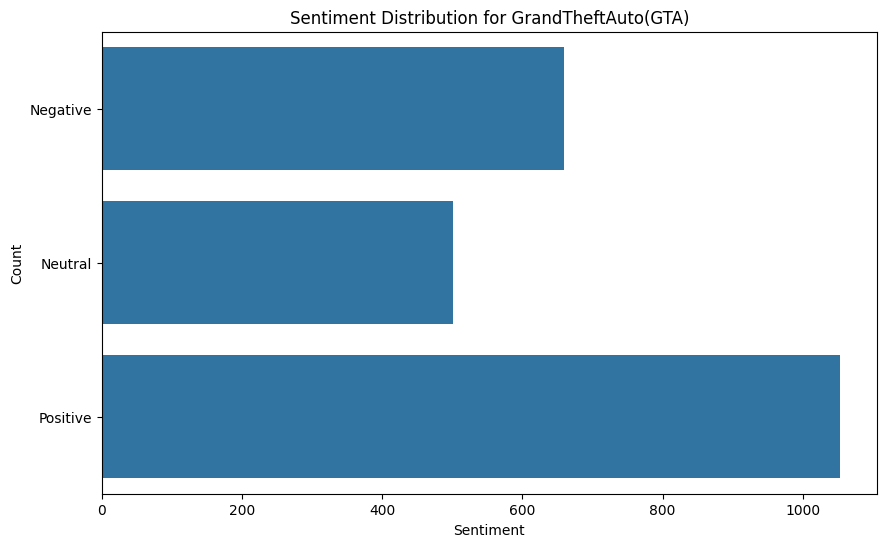

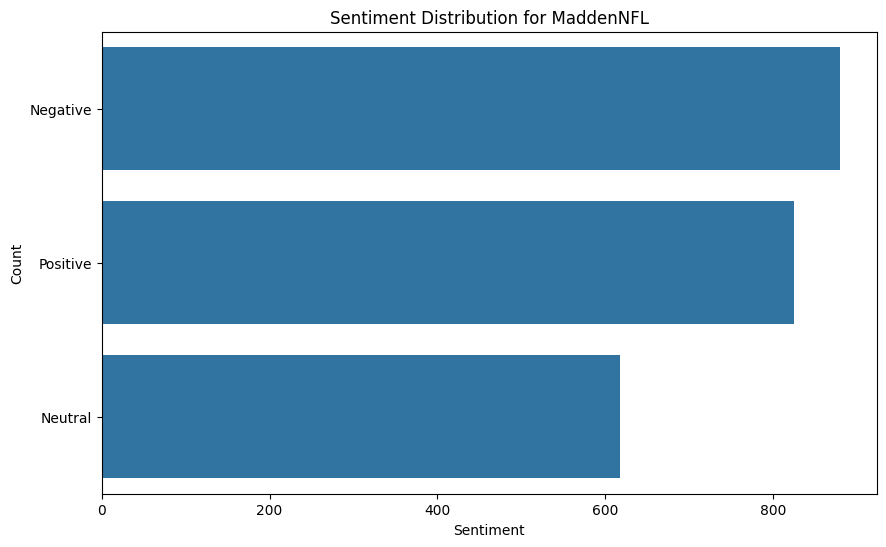

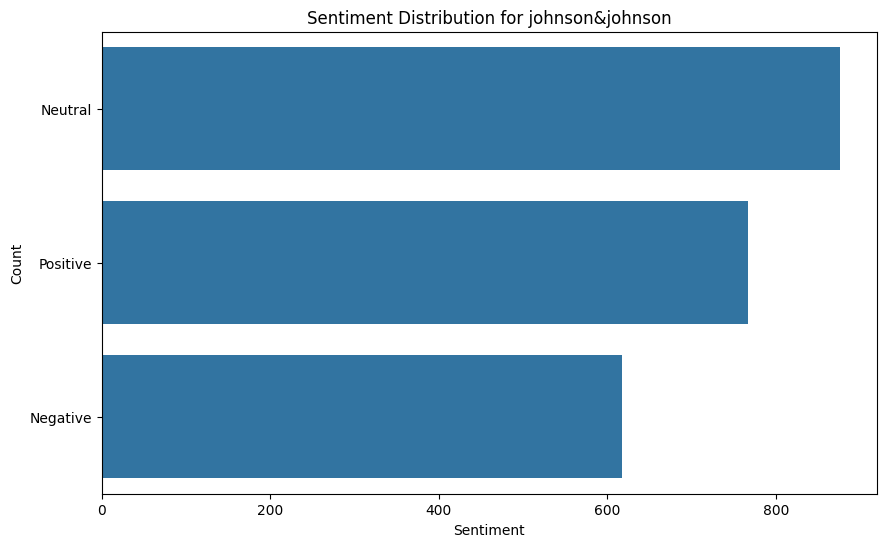

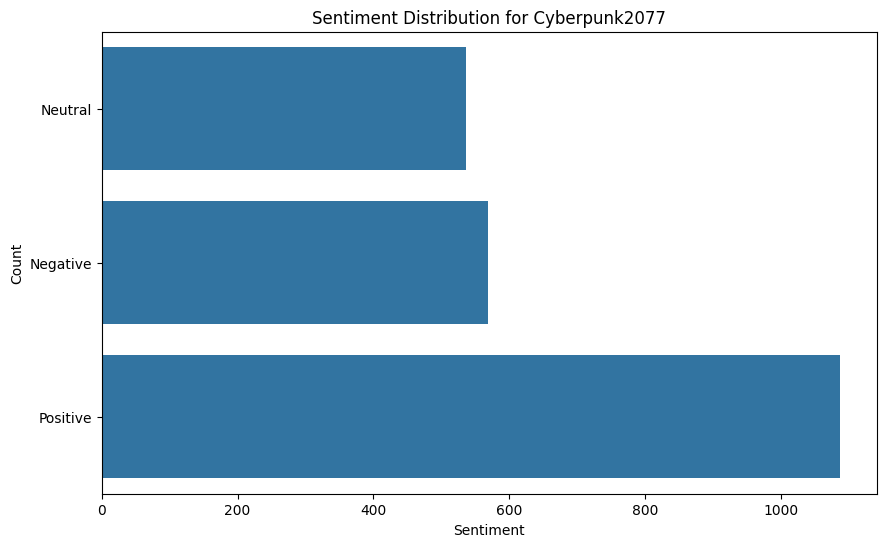

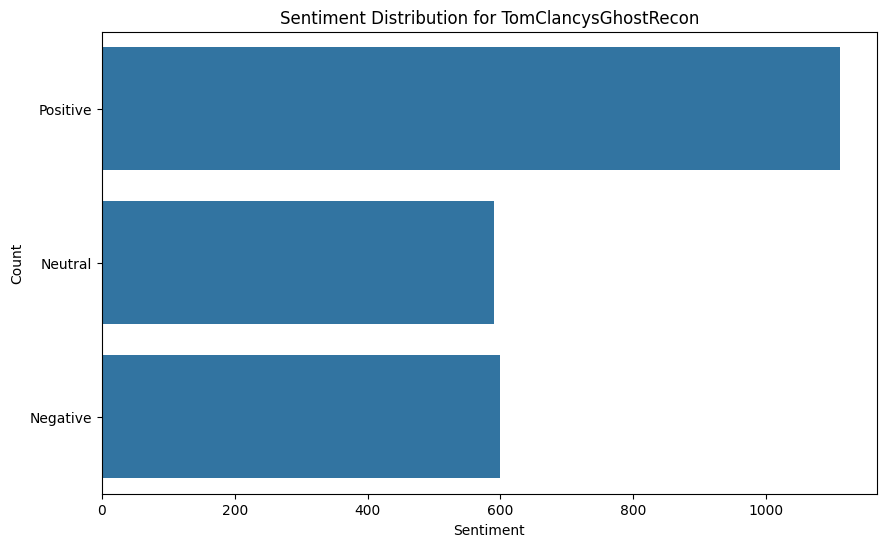

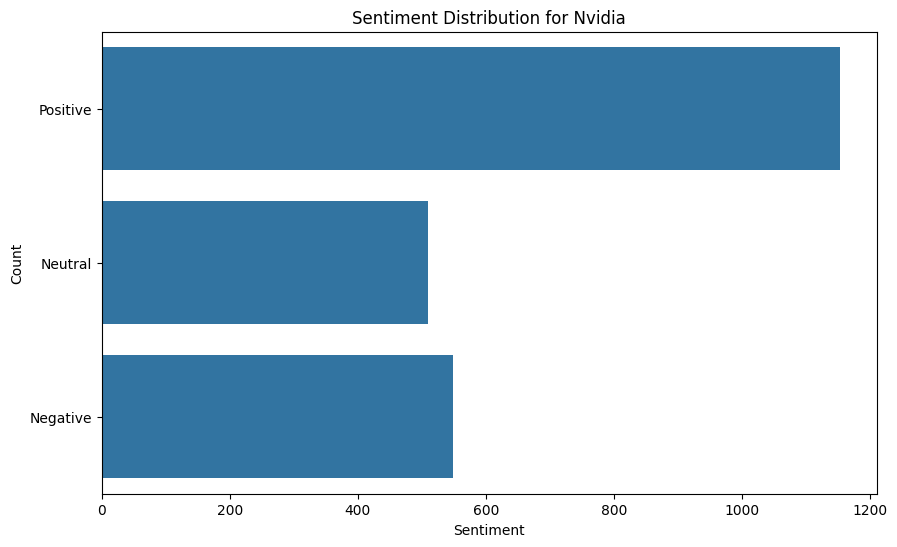

In [33]:
# Sentiment by specific entities
entities = data['Entity\t'].unique()

for entity in entities:
    entity_data = data[data['Entity\t'] == entity]
    plt.figure(figsize=(10, 6))
    sns.countplot(entity_data['Sentiment'])
    plt.title(f'Sentiment Distribution for {entity}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()